In [1]:
import sys 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
sys.path.insert(0, "../../")
import spycone as spy

/nfs/home/students/chit/.conda/envs/lio/lib/python3.7/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Gene-level workflow

## Prepare the dataset

We use a time series dataset of influenza infection with 9 time points. 

In [2]:
#sample data
import os
os.chdir("/nfs/proj/spycone/")


influ = pd.read_csv("./spycone_pkg/data/normticoneinflu_wide.csv", dtype={'entrezid': str})
gene_list = influ['entrezid'] 
symbs = influ['symbol']

flu_ts = influ.iloc[:,3:] ##filter out the entrez id and gene id column


Import expression data with `DataSet` which stores the count matrix, list of gene ID, number of time points, and number of replicates. \
`ts` : time series data values with columns as each sample e.g. the order of the columns should be **sample1_rep1**, **sample1_rep2**, **sample2_rep1**, **sample2_rep2** and so on.... \
`gene_id` : the pandas series or list of gene id (can be entrez gene id or ensembl gene id) \
`species` : specify the species ID \
`reps1` : Number of replicates \
`timepts` : Number of time points \
`discreization_steps` : Steps to discretize the data values

In [3]:
flu_dset = spy.dataset(ts=flu_ts, 
                        gene_id = gene_list, 
                        species=9606,
                        keytype="entrezgeneid",
                        reps1 = 5, 
                        timepts = 9,
                        discretization_steps = [20,20])

Import biological network of your choice with `BioNetwork`, Spycone provides Biogrid, IID network in entrez ID as node name. Please specify the keytype if you are using a different ID.

In [4]:
bionet = spy.BioNetwork("spycone_pkg/spycone/data/network/9606_biogrid_entrez.tab")

## Preprocessing

Filtering out genes that has expression across all time points lower than 1. By giving the biological network, it removes genes from the dataset that are not in the network.

In [5]:
spy.preprocess(flu_dset, bionet)

Input data dimension: (19463, 9)
Removed 0 objects with 0 values.


../../spycone/preprocess.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  nodes_to_remove = nodelist[[np.array(np.isin(BioNetwork.lst_g(), DataSet.gene_id, invert=True))]]


Removed 1677 objects in dataset that are not in the network
Removed 1844 nodes in network that are not in the dataset
Filtered data: (17619, 9)


## Clustering

`clustering` create clustering object that provides varies algorithms and result storage.

In [6]:
asclu = spy.clustering(flu_dset, algorithm='hierarchical', metrics="correlation", input_type="expression", n_clusters=15, composite=False)
c = asclu.find_clusters()

clustering took 33.31951904296875s. 


visualizing clustering

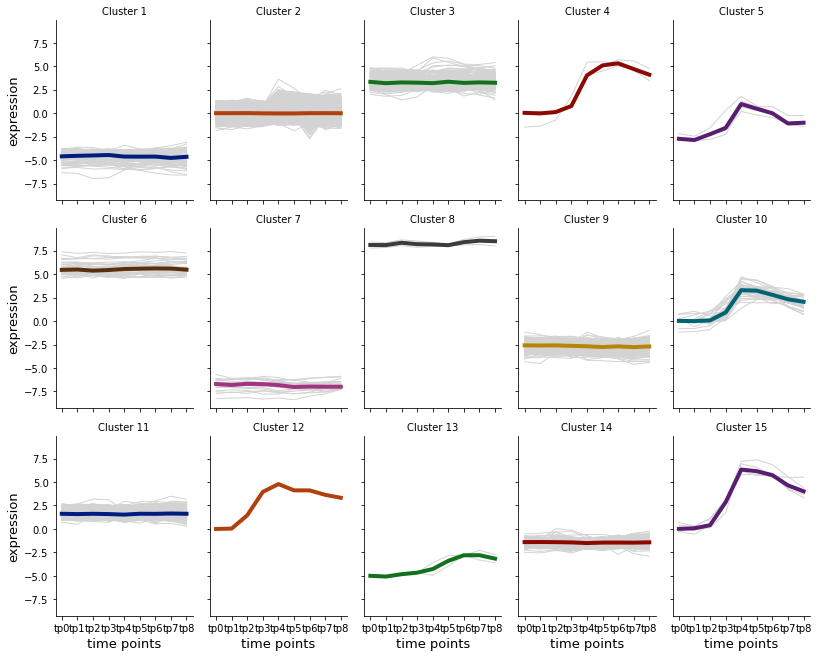

In [7]:
%matplotlib inline
spy.vis_all_clusters(asclu, col_wrap=5)

## Gene set enrichment analysis

Perform gene set enrichment analysis using `clusters_gsea`. Change the gene_sets parameter into the choice of your knowledge base or gene set database, e.g. Reactome, KEGG, etc. Use `spy.list_genesets` to view the available knowledge base.

In [8]:
spy.list_genesets(organism="human")[0:5]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues']

In [9]:
asclu_go = spy.clusters_gsea(flu_dset, 9606, method="gseapy", gene_sets = ['GO_Biological_Process_2018'])

2021-10-06 17:50:08,549 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2021-10-06 17:50:14,256 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2021-10-06 17:50:21,090 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2021-10-06 17:50:37,714 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2021-10-06 17:50:43,143 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


---------Gene Set Enrichment Result---------

Cluster 2  found enriched in 364 terms.
Cluster 11  found enriched in 0 terms.
Cluster 14  found enriched in 0 terms.
Cluster 3  found enriched in 0 terms.
Cluster 7  found enriched in 7 terms.
Cluster 9  found enriched in 2 terms.
Cluster 6  found enriched in 0 terms.
Cluster 1  found enriched in 0 terms.
Cluster 10  found enriched in 57 terms.
Cluster 5  found enriched in 67 terms.
Cluster 13  found enriched in 11 terms.
Cluster 4  found enriched in 27 terms.
Cluster 15  found enriched in 37 terms.
Cluster 12  found enriched in 21 terms.
Cluster 8  found enriched in 1 terms.
-----END-----


<Figure size 216x288 with 0 Axes>

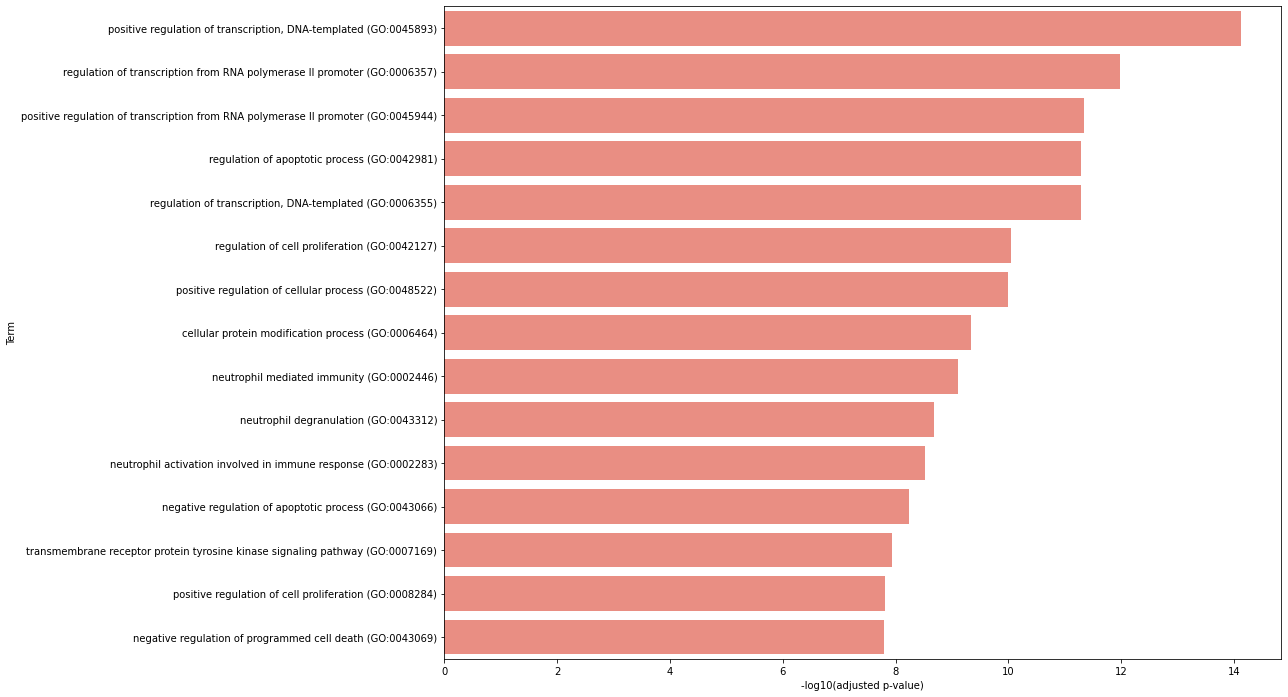

In [16]:
spy.gsea_plot(asclu_go, cluster=2, nterms=15)

## Run DOMINO

In [17]:
mod = spy.run_domino(asclu, network_file="./spycone_pkg/spycone/data/network/9606_biogrid_entrez.tab")

start running DOMINO...
---------Network enrichment Result---------

Cluster 2 Module 0 has 274 nodes.
Cluster 2 Module 1 has 199 nodes.
Cluster 2 Module 2 has 248 nodes.
Cluster 2 Module 3 has 177 nodes.
Cluster 2 Module 4 has 202 nodes.
Cluster 2 Module 5 has 166 nodes.
Cluster 2 Module 6 has 155 nodes.
Cluster 2 Module 7 has 137 nodes.
Cluster 2 Module 8 has 146 nodes.
Cluster 2 Module 9 has 171 nodes.
Cluster 2 Module 10 has 153 nodes.
Cluster 2 Module 11 has 127 nodes.
Cluster 2 Module 12 has 132 nodes.
Cluster 2 Module 13 has 97 nodes.
Cluster 2 Module 14 has 96 nodes.
Cluster 2 Module 15 has 105 nodes.
Cluster 2 Module 16 has 94 nodes.
Cluster 2 Module 17 has 110 nodes.
Cluster 2 Module 18 has 106 nodes.
Cluster 2 Module 19 has 107 nodes.
Cluster 2 Module 20 has 91 nodes.
Cluster 2 Module 21 has 113 nodes.
Cluster 2 Module 22 has 89 nodes.
Cluster 2 Module 23 has 104 nodes.
Cluster 2 Module 24 has 95 nodes.
Cluster 2 Module 25 has 77 nodes.
Cluster 2 Module 26 has 75 nodes.
Clus